<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/08c-diamonds.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 8c -- diamonds

Linear regression with the diamonds dataset (continued)

In module 6, we covered:

* Visualizing regression models with Seaborn
* Linear regression with linear model
* Nonlinearity (linear regression with polynomials)
* Scaling -- price vs carats

In this module, we'll use the same dataset to cover:

* Using residuals to assess statistical assumptions
* Investigate distributions with histograms to distinguish signal vs noise
* Q-Q plots -- visual assessment of data/model distributions
* Box plots (justifying multiple-input/feature model)
* Adding categorical features (forward selection)

## diamonds dataset

* [diamonds dataset](https://ggplot2.tidyverse.org/reference/diamonds.html) -- tidyverse.org



In [55]:
import pandas as pd

url = "https://github.com/tidyverse/ggplot2/raw/master/data-raw/diamonds.csv"
diamonds = pd.read_csv(url)

diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


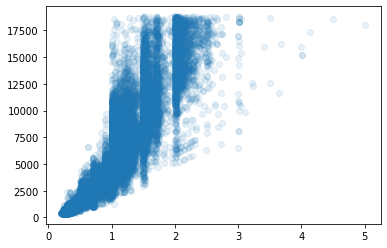

In [56]:
import matplotlib.pyplot as plt

# Use opacity (alpha channel) to aid visualization with large amounts of data
plt.scatter(diamonds['carat'], diamonds['price'], alpha=.1);

In [57]:
# Linear regression with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

# Use the entire dataset
df = diamonds

# Fit the model to the data
model = LinearRegression()
model.fit(df[['carat']], df['price'])

# Evaluate the performance
yhat = model.predict(df[['carat']])
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(df['price'], yhat)))

Explained variance: 84.93%


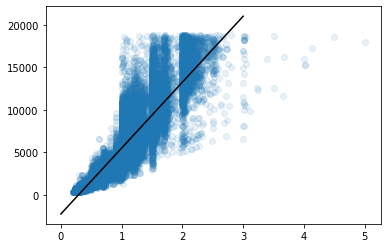

In [58]:
# Plot the model prediction (no noise) as a smooth curve
X_model = [[0], [3]] # dependent variable, no noise
yhat_model = model.predict(X_model) # compute the model prediction

plt.plot(X_model, yhat_model, color='k')

# Plot the data (scatterplot)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.show();

# Evaluate model performance

Investigate two methods of creating a train/test split.


In [59]:
# Train-test split with scikit-learn
from sklearn.model_selection import train_test_split

# Train-test split -- split the dataset
def my_train_test_split(X, y, test_size=.3):
    n_training_samples = int((1.0 - test_size) * X.shape[0])

    X_train = X[:n_training_samples,:]
    y_train = y[:n_training_samples]

    X_test = X[n_training_samples:,:]
    y_test = y[n_training_samples:]

    return X_train, X_test, y_train, y_test

# Train/test split

Choose one of two methods:

* Method #1: simple split of the dataset with `my_train_test_split()`
* Method #2: `scikit-learn.model_selection.train_test_split`


In [60]:
# Sample the entire dataset
X = df['carat'].values.reshape(-1,1)
y = df['price'].values

# Method #1: Train/test split based on sequential sampling of the dataset
X_train, X_test, y_train, y_test = my_train_test_split(X, y, test_size=0.3)

# Method #2: Train/test split with scikit-learn (random sampling)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

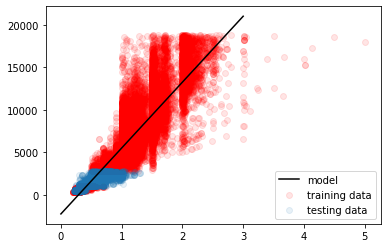

In [61]:
# Plot the model prediction (no noise) as a smooth curve
X_model = [[0], [3]] # dependent variable, no noise
yhat_model = model.predict(X_model) # compute the model prediction
plt.plot(X_model, yhat_model, color='k', label="model")

# Plot the data (scatterplot)
plt.scatter(X_train, y_train, color=['red'], alpha=.1, label="training data")
plt.scatter(X_test, y_test, alpha=.1, label="testing data")
plt.legend();


Data visualization explains the difference between the two methods of train/test split.

Discussion: The results are very sensitive to the way in which the train/test split is implemented with Method #1. This might be interpreted as overfitting. However, overfitting is not what you would expect with a large dataset (more than 50K samples) and a very simple linear-regression model. But data visualization reveals that the sensitivity with Method #1 is really a symptom of model bias combined with non-uniform sampling in the dataset. In fact, with a train/test split based on randomized sampling (Method #2), training and test performance are nearly identical.

Note: To keep things simple, the analysis below doesn't use train/test splits.

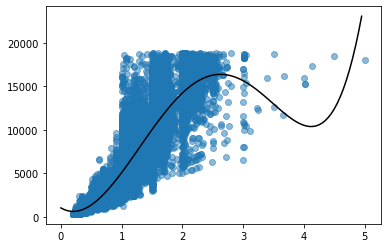

Explained variance: 87.00%


In [62]:
import numpy as np

# Linear regression with polynomials is built-in with Seaborn
# With Scikit-Learn, you need to do it yourself.
from sklearn.preprocessing import PolynomialFeatures

# Add PolynomialFeatures of desired degree
# Inspect X to confirm the result (original series is in column #1
# Column #0 is full of ones (i.e., the intercept)
# To plot a line, use degree=1, in which case X_poly has 2 columns
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Fit the model to the data
# Note: PolynomialFeatures adds the intercept (ones) to column 0
# hence fit_intercept=False, and the data gets moved to column 1
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

# Plot the model prediction (no noise) as a smooth curve
X_model = np.arange(0, 5, .05).reshape(-1, 1) # dependent variable, no noise
X_model = poly.transform(X_model) # add the polynomials
yhat_model = model.predict(X_model) # compute the model prediction
plt.plot(X_model[:,1], yhat_model, color='k') # remember: column 1 is the dependent variable

# Plot the data (scatterplot)
plt.scatter(X[:,0], y, alpha=.5)
plt.show();

# Compute the model prediction at the data points
yhat = model.predict(X_poly)

print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

# Residuals

* The simple linear regression model (above) clearly suffers from being oversimplified (high bias).
* Linear regression with a high-order polynomial model has problems as well.
    * The problems are worse where the data are sparse.
* Visualize the residuals to help assess model performance
    * In particular, check for "structure" in residuals that's inconsistent with random noise.

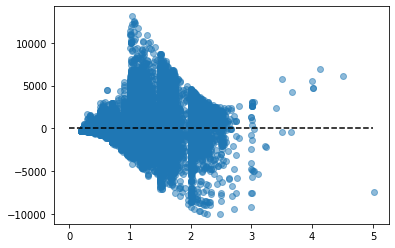

In [63]:
# Plot the residuals
plt.scatter(X[:,0], y - yhat, alpha=.5)
plt.plot([0, 5], [0,0], linestyle="dashed", color="k")
plt.show();

* If you investigate different values for "degree" in PolynomialFeatures
    * Results:
    * degree = 1 is a linear fit
    * degree > 1 produces strange features where data are sparse
        * but the degree doesn't matter where data are dense
* Investigate the impact of sub-sampling scheme

# Logarithmic dependency?

* Clearly there's structure in the residuals -- is it logarithmic?


# Log scales

* Exponential structure suggests logarithmic scale transformation...
    * ...but `log(x)` isn't helpful in this case
* We can see that by transforming `x` ourselves with matplotlib

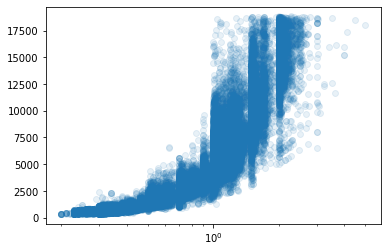

In [64]:
# Log-x scaling for the independent variable (x = carat)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_xscale('log');

* What about `log(y)`?
* Again, this can be visualized with matplotlib

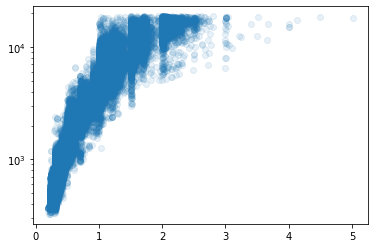

In [65]:
# Log scaling for the dependent variable (y = price)
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_yscale('log');

* And log-log?

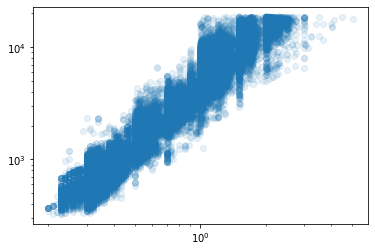

In [66]:
# Data seem relatively linear with log-log scales
plt.scatter(df['carat'], df['price'], alpha=.1)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log');

# Modeling logarithmic dependencies

* log transformation of the data - create two new columns
* transform both feature & target variables for log-log regression
* perform linear regression with log-transformed variables

In [67]:
# Create a column with log(price) and a column with log(carat)
diamonds['log(price)'] = diamonds['price'].transform(np.log10)
diamonds['log(carat)'] = diamonds['carat'].transform(np.log10)

In [68]:
# Linear regression with log-transformed data
df = diamonds

X = df[['log(carat)']]
y = df['log(price)']

# Fit the model to the data
model = LinearRegression()
model.fit(X, y)

# Predict the data with the model
yhat = model.predict(X)

# Assign model to a new column in the dataframe
df = df.assign(model_loglog = yhat)

# Evaluate the performance
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

Explained variance: 93.30%


In [69]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.440437,-0.142668,3.430122
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3.440437,-0.142668,3.430122
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.440437,-0.154902,3.409619
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.440437,-0.065502,3.559438


# Residuals with log-log scaling

Is this better?

Be careful about comparing explained variance -- we've rescaled the data.

We need a way to assess the assumption of model + random noise. We'll further analyze the residuals.

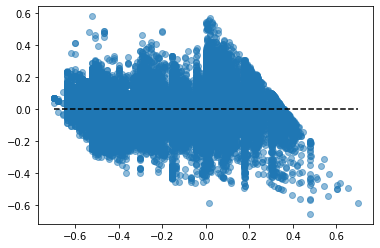

In [70]:
# Plot the residuals
X = df['log(carat)']
residuals = df['log(price)'] - df['model_loglog']

plt.scatter(X, residuals, alpha=.5)
plt.plot([-.7, .7], [0,0], linestyle="dashed", color="k")
plt.show();

# STOPPED HERE


# Evaluating the distribution of errors

* Can you provide a quantitative assessment of the residuals?
* Consider an idealized setting, where we know the true model and the true error distribution

In [71]:
# Generate some synthetic data: linear model plus random noise
import random
import numpy as np
import matplotlib.pyplot as plt

m = 100

# Model
w0 = 3
w1 = 0.042
xs = np.arange(0, m * 100) / m
ys = w0 + w1 * xs

# Noise
mu, sigma = 0, 0.1 # mean and standard deviation
random.seed(42) # for reproducibility
eps = [random.normalvariate(mu, sigma) for i in enumerate(xs)]

# Data
data = ys + eps

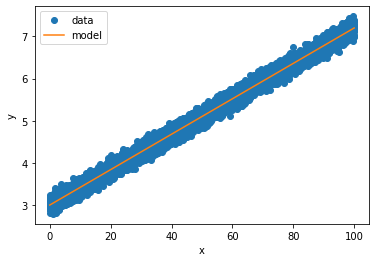

In [72]:
# Visualization with matplotlib
plt.plot(xs, data,'o', label='data')
plt.plot(xs, ys, label='model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

In [73]:
# Linear regression with scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score

Xs = xs.reshape(-1,1)

print(xs.shape)
print(Xs.shape)

# Fit the model to the data
model = LinearRegression()
model.fit(Xs, data)

# Evaluate the performance
ys_hat = model.predict(Xs)
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(data, ys_hat)))

(10000,)
(10000, 1)
Explained variance: 99.30%


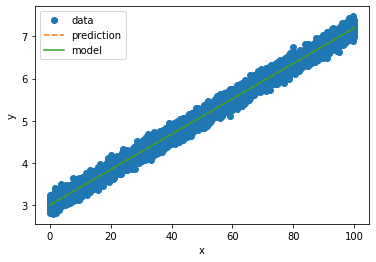

In [74]:
# Visualization with matplotlib
plt.plot(xs, data,'o', label='data')
plt.plot(xs, ys_hat,'--', label='prediction')
plt.plot(xs, ys, label='model')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

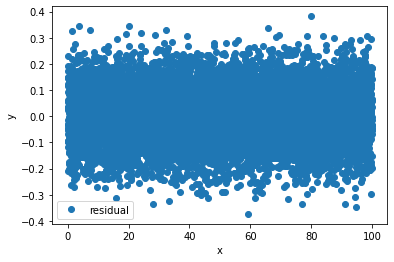

In [75]:
# Scatterplot of the residuals
plt.plot(xs, data - ys_hat, 'o', label='residual')
plt.ylabel('y')
plt.xlabel('x')
plt.legend();

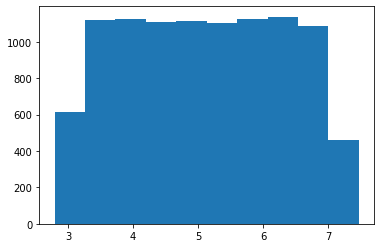

In [76]:
# Histogram of the data (linear model + error)
plt.hist(data);

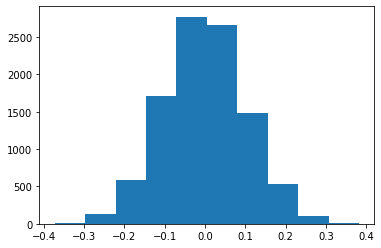

In [77]:
# Histogram of the errors
plt.hist(data - ys_hat);

# Visualizing data distributions

* Statistical assessment of data and residuals
* Histograms with matplotlib
    * assessing the assumption of random noise
    * looking for [skewness](https://en.wikipedia.org/wiki/Skewness) or other departures from normal distribution
    * styling with the matplotlib API
* Clearly, diamond "price" is right skewed

axes: AxesSubplot(0.125,0.125;0.775x0.755)
lines (histograms do not use lines): <a list of 0 Line2D objects>
children: <class 'list'> 20
children[0]: Rectangle(xy=(326, 0), width=1849.7, height=25335, angle=0)


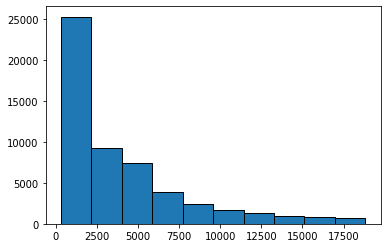

In [78]:
from matplotlib.patches import Rectangle

# Histogram of price is highly skewed (positive or right skew)
plt.hist(diamonds['price']);

# Histogram styling. It can be done, but...
ax = plt.gca()
lines = ax.get_lines()
children = ax.get_children()
print('axes:', ax)
print('lines (histograms do not use lines):', lines)
print('children:', type(children), len(children))
print('children[0]:', children[0])
[child.set_edgecolor('k') for child in children if isinstance(child, Rectangle)];

In [79]:
# Convenience function for styled histograms
def styled_histogram(series):
    plt.hist(series)
    ax = plt.gca()
    children = ax.get_children()
    [child.set_edgecolor('k') for child in children if isinstance(child, Rectangle)];

# Distribution of log(price)

* Compare distributions of price & log(price)
* Compare distributions residuals from log-log model

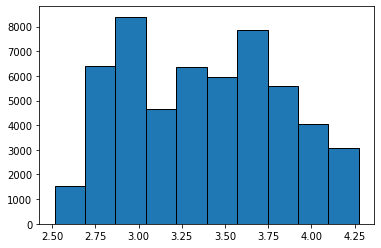

In [80]:
# Distribution of log(price) is much more symmetric
styled_histogram(df['log(price)'])

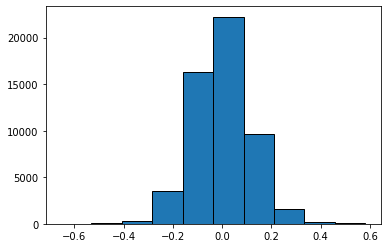

In [81]:
# Plot the histogram of the residuals from the linear regression of log-log data
residuals = df['log(price)'] - df['model_loglog']
styled_histogram(residuals)

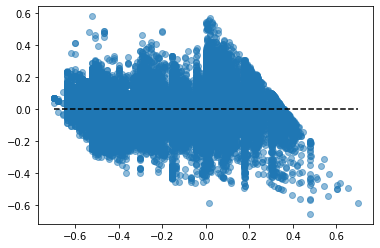

In [82]:
# Plot the residuals
plt.scatter(X, residuals, alpha=.5)
plt.plot([-.7, .7], [0,0], linestyle="dashed", color="k")
plt.show();

# Q-Q plot

The distributions are symmetric, but are they "good"? And what is a metric for "good"?

We'll use Q-Q plots -- a graphical method for comparing two probability distributions.

* [Q-Q (quantile-quantile) plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) -- wikipedia
* Quantiles of data compared with theoretical probability distribution
* [Quantiles](https://en.wikipedia.org/wiki/Quantile) are values dividing a probability density into equal areas
* Using the scipy.stats library, default theoretical distribution is standard normal
* Using statsmodels, the default distribution is scipy.stats.distributions.norm

### references

* [scipy.stats.probplot()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) -- scipy.org
* [statsmodels.graphics.gofplots.qqplots()](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html#statsmodels.graphics.gofplots.qqplot) -- statsmodels.org


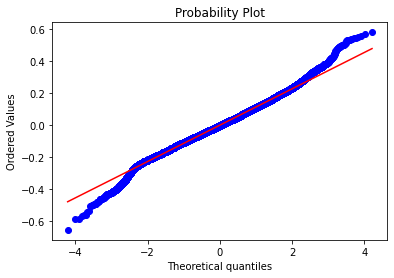

In [83]:
# Q-Q plot using scipy.stats with default styles
from scipy import stats
stats.probplot(residuals, plot=plt);

## Create a convenience function for a styled Q-Q plot

`stats.probplot()` uses 2 plots types (line and scatterplot) with rather harsh colors

* [scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html) API reference docs - scipy.org
    * plots quantiles of data against Normal distribution (default)
* Q: Can I change the colors?
* A: Yes, but the `scipy.stats` API docs don't speak to this.
    * You need to use the matplotlib API

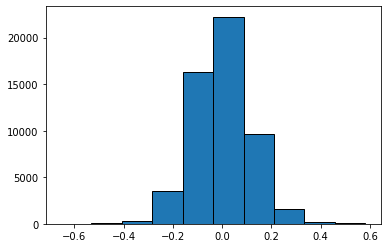

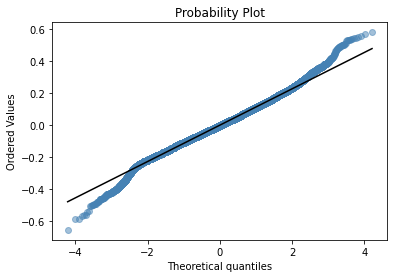

In [84]:
def qqplot(data):
    stats.probplot(data, plot=plt)

    # Change the styling
    ax = plt.gca()
    lines = ax.get_lines() # there are two -- dots and line
    lines[0].set_markerfacecolor("steelblue")
    lines[0].set_markeredgecolor("steelblue")
    lines[0].set_alpha(0.5)
    lines[1].set_color('k');

# Residuals of the model with log-log scaling
styled_histogram(residuals)
plt.show()

qqplot(residuals)

# Residuals of the linear model

* price as a function of carats -- linear scaling
* the Q-Q plot shows much larger deviation from standard normal


In [85]:
X_linear = df[['carat']]
y_linear = df['price']

# Fit the model to the data
model = LinearRegression()
model.fit(X_linear, y_linear)

# Evaluate the performance
yhat_linear = model.predict(X_linear)
residuals_linear = y_linear - yhat_linear
print('Explained variance: {:.2f}%'.format(100 * explained_variance_score(y_linear, yhat_linear)))

Explained variance: 84.93%


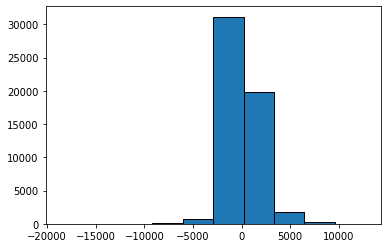

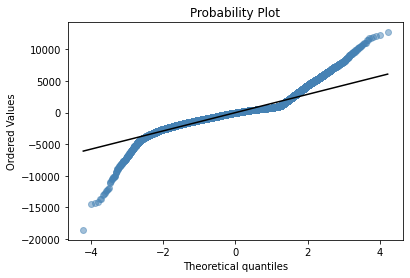

In [86]:
# Residuals of the linear model (i.e., no log scaling)
styled_histogram(residuals_linear)
plt.show();

qqplot(residuals_linear)

# Q-Q plot with statsmodels

* compare residuals from 2 linear regression models:
  * linear scaling
  * log-log scaling

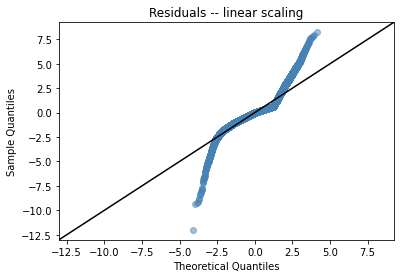

In [87]:
# Q-Q plot with statsmodels
import statsmodels.api as sm
sm.qqplot(residuals_linear, fit=True, line="45")

# Change the styling
ax = plt.gca()
lines = ax.get_lines() # there are two -- dots and line
lines[0].set_markerfacecolor("steelblue")
lines[0].set_markeredgecolor("steelblue")
lines[0].set_alpha(0.5)
lines[1].set_color('k')
plt.title("Residuals -- linear scaling");

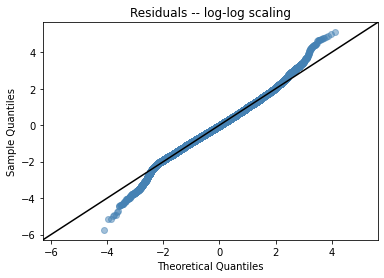

In [88]:
# Q-Q plot with statsmodels
import statsmodels.api as sm
sm.qqplot(residuals, fit=True, line="45")

# Change the styling
ax = plt.gca()
lines = ax.get_lines() # there are two -- dots and line
lines[0].set_markerfacecolor("steelblue")
lines[0].set_markeredgecolor("steelblue")
lines[0].set_alpha(0.5)
lines[1].set_color('k')
plt.title("Residuals -- log-log scaling");

# Other candidate predictors

In [89]:
print('Unique cuts:', df['cut'].unique())
print('Unique colors:', df['color'].unique())
print('Unique clarities:', df['clarity'].unique())

Unique cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique colors: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique clarities: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [90]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822


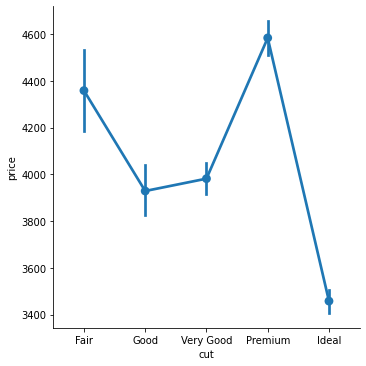

In [91]:
# Another visualization of the same data -- Q: Is this more informative?
# It exhibits the non-intuitive relationship between price & cut that we've seen before
import seaborn as sns

cuts = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

sns.catplot(data=df, x="cut", y="price", kind="point", order=cuts);

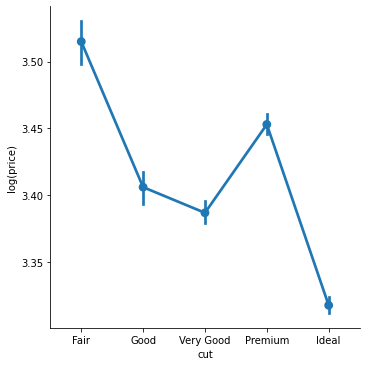

In [92]:
# Likewise for log(price) -- relationship to "cut" is hard to understand
sns.catplot(data=df, x="cut", y="log(price)", kind="point", order=cuts);

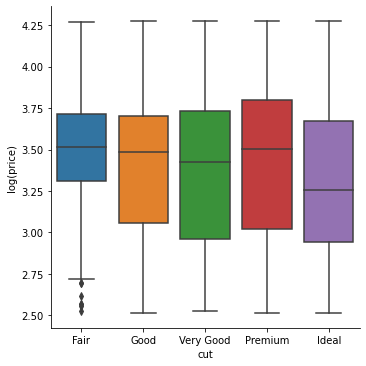

In [93]:
# Box plot exhibits similar relationship
sns.catplot(data=df, x="cut", y="log(price)", kind="box", order=cuts);

In [94]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log(price),log(carat),model_loglog
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2.513218,-0.638272,2.599580
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2.513218,-0.677781,2.533370
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2.514548,-0.638272,2.599580
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,2.523746,-0.537602,2.768284
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2.525045,-0.508638,2.816822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3.440437,-0.142668,3.430122
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3.440437,-0.142668,3.430122
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3.440437,-0.154902,3.409619
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3.440437,-0.065502,3.559438


## Comparing residuals of linear regression

Visualize the relationship between diamond "cut" and residuals of linear model (after log-log transormation).

In contrast with visualization above, residuals exhibit the expected relationship to cut:

Higher cut quality is asociated with larger log(price) 

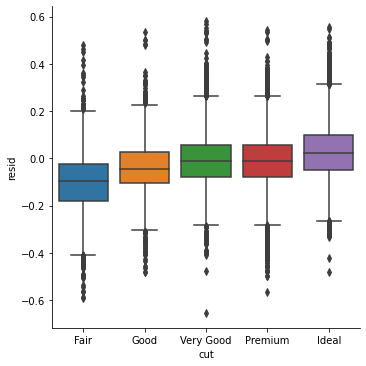

In [95]:
df['resid'] = df['log(price)'] - df['model_loglog']
df

sns.catplot(data=df, x="cut", y="resid", kind="box", order=cuts);

# Linear regression with categorical features - one-hot encoding

* You *can* do linear regression with categorical features
  * one-hot encoding of categorical features
  * use `drop="first"` (to avoid colinear inputs)
* predict log(price)
* add log(carat) as a feature
* [6.3 Preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) (sklearn.preprocessing package) -- scikit-learn.org
    * [6.3.4 Encoding categorical features](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) -- scikit-learn.org
    * One-hot encoding of categorical features (indicator variables)
* Documentation discusses `drop="feature"` parameter that avoids colinear inputs
    * Colinear inputs would cause non-regularized linear regression to fail

### modeling the residuals

* the next cell uses categorical features to model the residuals of linear regression with log-log transformation
  * first model -- log(price) vs log(carat)
  * this is a type of "forward selection"

In [96]:
# Multivariate linear regression of residuals from log-log model
# Uses one-hot encoding of the categorical features
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.metrics import explained_variance_score

enc = preprocessing.OneHotEncoder(drop="first")
#enc = preprocessing.OneHotEncoder()

y = df['resid']
X = df.loc[:, ['cut', 'color', 'clarity']].values

X = enc.fit_transform(X)

model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)

print('Explained variance (before): {:.2f}%'.format(100 * explained_variance_score(df['log(price)'], df['model_loglog'])))
print('Explained variance (after): {:.2f}%'.format(100 * explained_variance_score(df['log(price)'], df['model_loglog'] + yhat)))

Explained variance (before): 93.30%
Explained variance (after): 97.17%


# Simultaneous multivariate regression of log(price)

* rather than a sequence of models this model considers all variables simultaneously
* explained variance is larger than the result from the cell above

In [97]:
# Multivariate linear regression with one-hot encoding of categorical features
# This model includes log(carat) as a variable in the model
from sklearn import preprocessing
from scipy.sparse import hstack
from sklearn.metrics import explained_variance_score

enc = preprocessing.OneHotEncoder(drop="first")
#enc = preprocessing.OneHotEncoder()

y = df['log(price)']
X = df.loc[:, ['cut', 'color', 'clarity']].values

X = enc.fit_transform(X)

print(type(X))
print("X.shape:", X.shape)
print(len(enc.categories_))
print(enc.categories_)
print('df[log(carat)].shape', df['log(carat)'].values.reshape(-1,1).shape)

X = hstack((X, df[['log(carat)']].values))

model = LinearRegression()
model.fit(X, y)

yhat = model.predict(X)

print('Explained variance (before): {:.2f}%'.format(100 * explained_variance_score(y, df['model_loglog'])))
print('Explained variance (after): {:.2f}%'.format(100 * explained_variance_score(y, yhat)))

<class 'scipy.sparse.csr.csr_matrix'>
X.shape: (53940, 17)
3
[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object), array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object), array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
df[log(carat)].shape (53940, 1)
Explained variance (before): 93.30%
Explained variance (after): 98.26%


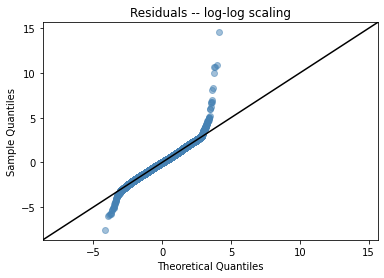

In [98]:
# Q-Q plot with statsmodels
import statsmodels.api as sm
sm.qqplot(y-yhat, fit=True, line="45")

# Change the styling
ax = plt.gca()
lines = ax.get_lines() # there are two -- dots and line
lines[0].set_markerfacecolor("steelblue")
lines[0].set_markeredgecolor("steelblue")
lines[0].set_alpha(0.5)
lines[1].set_color('k')
plt.title("Residuals -- log-log scaling");